<a href="https://colab.research.google.com/github/Lacikaki7/AI_project1/blob/main/Beadando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

Context
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load.

**Content**

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

**Acknowledgements**

This dataset is shared in a good intention to public to get familiar on Linear Regression on Multicollinery data.

**Inspiration**

Your data will be in front of the world's largest data science community. What questions do you want to see answered?

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Lacikaki7/AI_project1/main/Train.csv?token=GHSAT0AAAAAACJ7ZDHCVTB35RJNBFZ3CGTKZKKRLOQ")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [4]:
# The size of the dataset
len(df)

9568

In [5]:
# There are some missing data
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
# Are there any duplicates?
duplicates_index = df[df.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

**Overview: Structure of the Data preparation part.**

1.   Splitting the data to training and testing sets. We'll keep them separately, because testing data should be unseen.
2.   Data exploration in the training set
3.   Looking for outliers in the training set and drop them.
4.   Filling the missing values in the training set, drop the missing values in the test set to get realistic test results.
5.   Standardizing both datasets with the mean and standard deviation from the training set.

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("PE", axis=1)  # Bemeneti változók
y = df["PE"]  # Kimeneti változó

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
len(X_train), len(X_test), len(y_train), len(y_test)

(6697, 2871, 6697, 2871)

In [8]:
X_train.head()

,AT,V,AP,RH
8822,29.50,71.14,1011.27,52.81
3392,29.85,71.58,1010.04,58.66
6928,24.67,58.05,1011.31,69.95
1392,12.31,37.73,1023.30,63.01
6983,15.52,42.86,1015.09,83.48


In [9]:
X_train.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

In [10]:
y_train.isnull().sum()

0

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 8822 to 2191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6697 non-null   float64
 1   V       6697 non-null   float64
 2   AP      6697 non-null   float64
 3   RH      6697 non-null   float64
dtypes: float64(4)
memory usage: 261.6 KB


In [12]:
X_train.describe()

,AT,V,AP,RH
count,6697.000000,6697.000000,6697.000000,6697.000000
mean,19.602909,54.251284,1013.337750,73.150222
std,7.400700,12.645069,5.894129,14.648002
min,2.340000,25.360000,994.600000,25.890000
25%,13.460000,41.700000,1009.210000,62.980000
50%,20.380000,52.050000,1013.070000,74.830000
75%,25.650000,66.510000,1017.290000,84.900000
max,35.770000,80.180000,1033.250000,100.160000


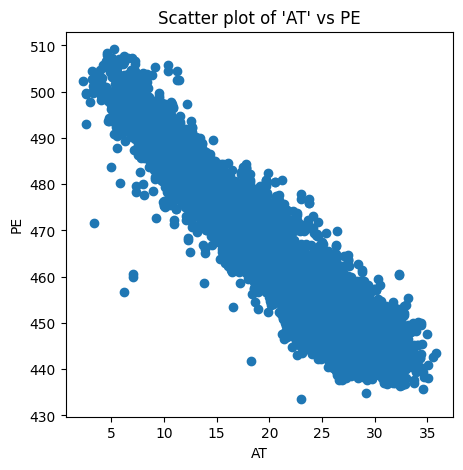

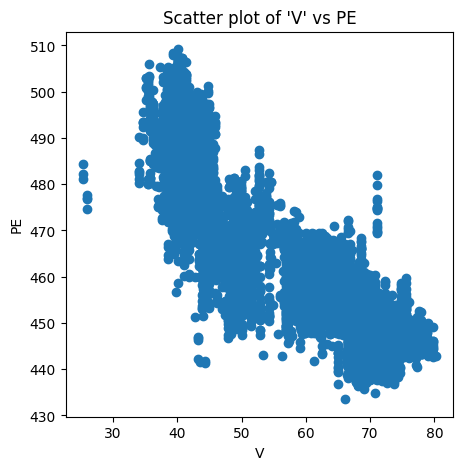

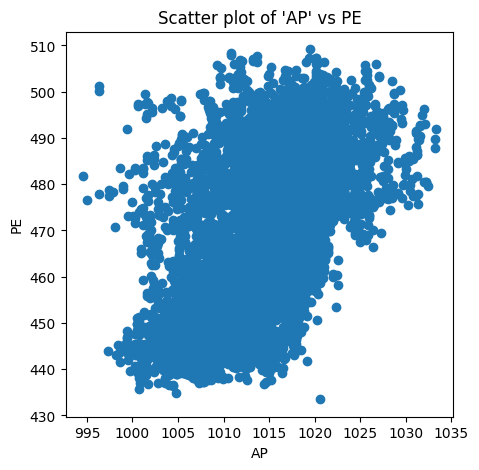

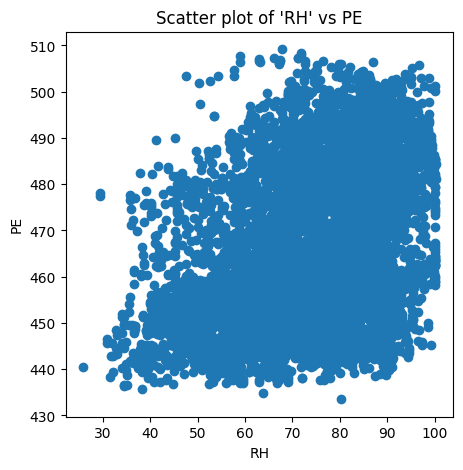

In [13]:
import matplotlib.pyplot as plt

column_names = list(X_train.columns)
for column in column_names:
    plt.figure(figsize=(5, 5))
    plt.scatter(x=X_train[column], y=y_train)
    plt.title(f"Scatter plot of '{column}' vs PE")
    plt.xlabel(column)
    plt.ylabel("PE")
    plt.show()
    print("\n")

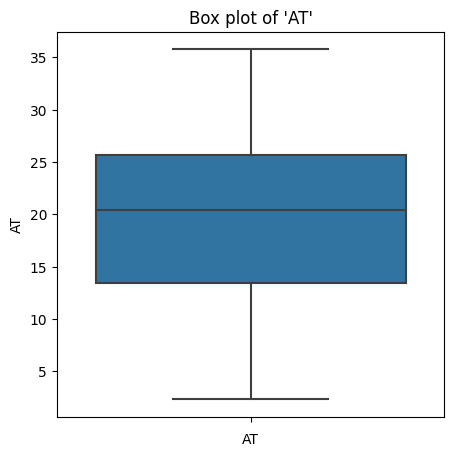

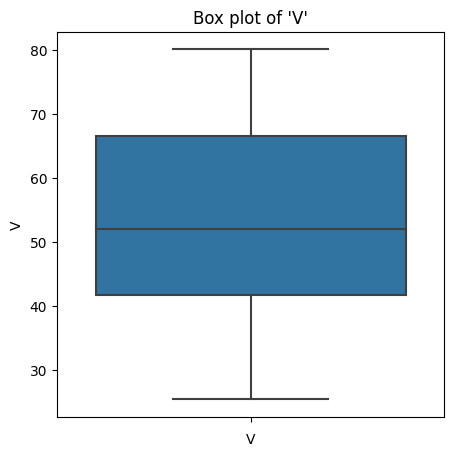

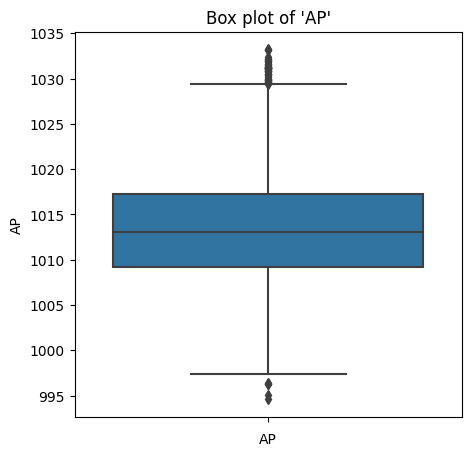

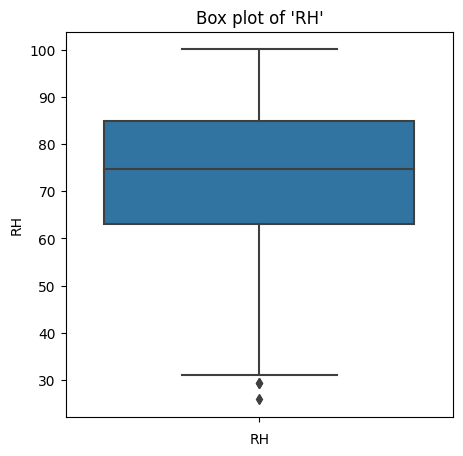

In [14]:
import seaborn as sns

for column in column_names:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=X_train[column])
    plt.title(f"Box plot of '{column}'")
    plt.xlabel(column)
    plt.show()
    print("\n")

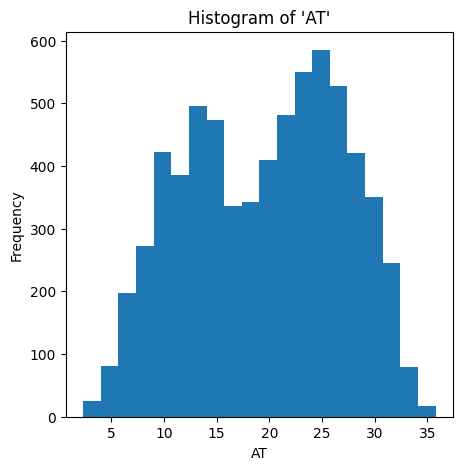

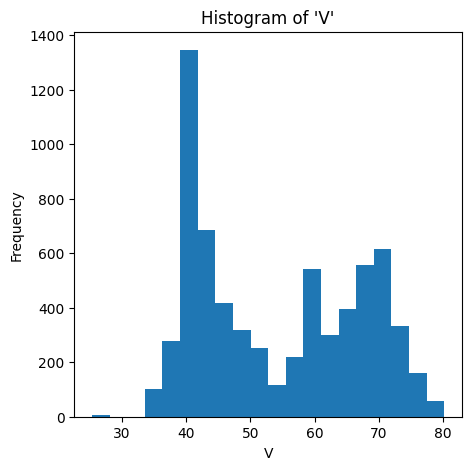

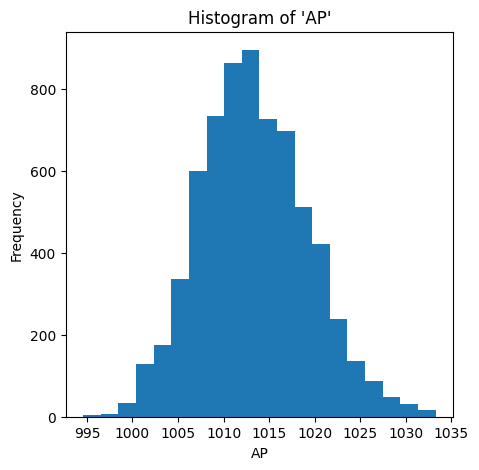

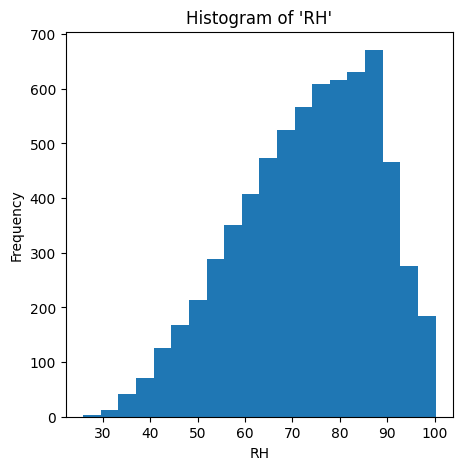

In [15]:
for column in column_names:
    plt.figure(figsize=(5, 5))
    plt.hist(X_train[column], bins=20)
    plt.title(f"Histogram of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print("\n")

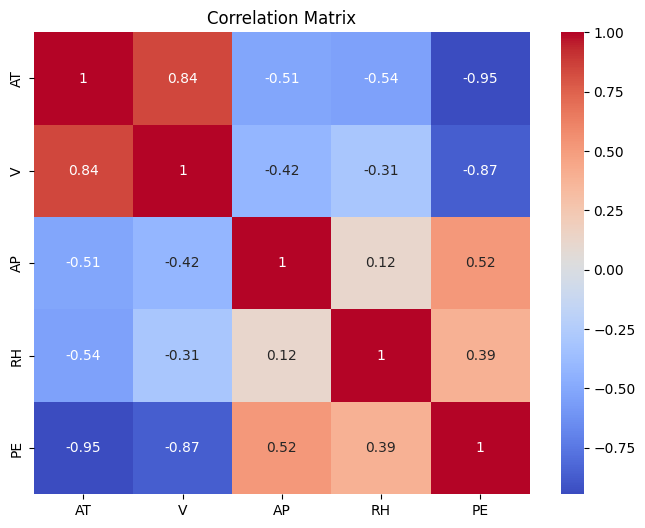

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [17]:
X_train_mean = X_train.mean()  # Számítsuk ki a tanító adathalmaz átlagát
X_train_std = X_train.std()    # Számítsuk ki a tanító adathalmaz szórását

# Standardizálás a tanító adathalmazon
X_train_scaled = (X_train - X_train_mean) / X_train_std

# Standardizálás a teszthalmazon a tanító adathalmaz statisztikáit felhasználva
X_test_scaled = (X_test - X_train_mean) / X_train_std

X_train_scaled.head()

,AT,V,AP,RH
8822,1.337318,1.335597,-0.350815,-1.388600
3392,1.384611,1.370393,-0.559497,-0.989229
6928,0.684677,0.300411,-0.344029,-0.218475
1392,-0.985435,-1.306540,1.690199,-0.692260
6983,-0.551692,-0.900848,0.297287,0.705200


In [18]:
# Létrehozzuk a standardizált tanító adathalmazt
X_train_mean = X_train.mean()  # Számítsuk ki a tanító adathalmaz átlagát
X_train_std = X_train.std()    # Számítsuk ki a tanító adathalmaz szórását
X_train_scaled = (X_train - X_train_mean) / X_train_std

# Létrehozzuk a standardizált teszthalmazt a tanító adathalmaz statisztikái alapján
X_test_scaled = (X_test - X_train_mean) / X_train_std



Mean Squared Error (MSE): 21.68
R-squared (R^2): 0.93



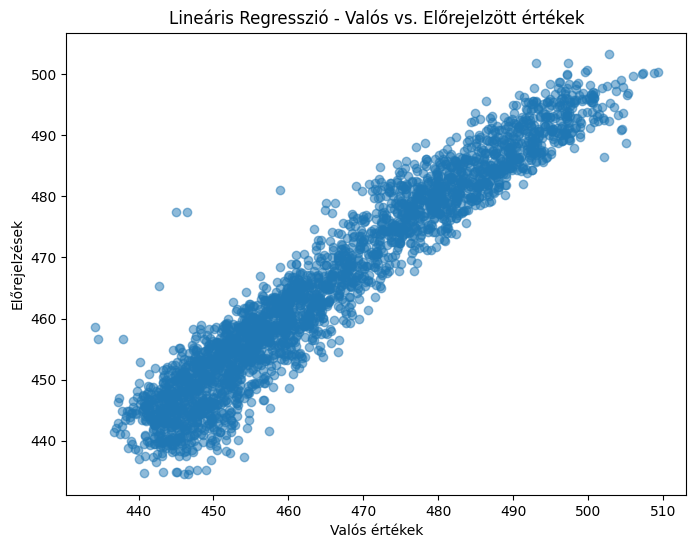

In [19]:
# Importáljuk a lineáris regressziós modellt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Létrehozzuk a lineáris regresszió modellt
model = LinearRegression()

# 2. Modell kiképzése:
# A modell kiképzése a tanító adathalmazon történik.
model.fit(X_train_scaled, y_train)

# 3. Modell értékelése:
# Az értékeléshez használjuk a teszthalmazt és számítsuk ki a predikciókat.
y_pred = model.predict(X_test_scaled)

# Mean Squared Error (MSE) számítása
mse = mean_squared_error(y_test, y_pred)

# R-squared (R^2) számítása
r2 = r2_score(y_test, y_pred)

# Eredmények kiíratása
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}\n")

# 4. Modell finomhangolása:
# A lineáris regresszió esetében nincs sok hiperparaméter finomhangolás, de más algoritmusoknál lehet ilyen lépés.

# 5. Vizualizáció:
# Készítsünk diagramokat az eredmények vizualizálására. Például egy scatter plot az előrejelzett és a valós értékekről.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valós értékek")
plt.ylabel("Előrejelzések")
plt.title("Lineáris Regresszió - Valós vs. Előrejelzött értékek")
plt.show()

Random Forest Mean Squared Error (MSE): 9.03
Random Forest R-squared (R^2): 0.97


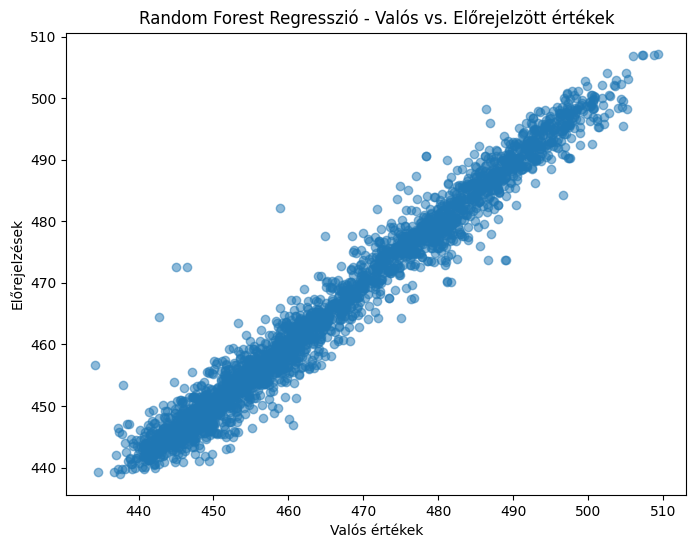

In [20]:
# Importáljuk a Random Forest regressziós modellt
from sklearn.ensemble import RandomForestRegressor

# Létrehozzuk a Random Forest regresszió modellt
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Modell kiképzése:
# A modell kiképzése a tanító adathalmazon történik.
rf_model.fit(X_train_scaled, y_train)

# 3. Modell értékelése:
# Az értékeléshez használjuk a teszthalmazt és számítsuk ki a predikciókat.
rf_y_pred = rf_model.predict(X_test_scaled)

# Mean Squared Error (MSE) számítása
rf_mse = mean_squared_error(y_test, rf_y_pred)

# R-squared (R^2) számítása
rf_r2 = r2_score(y_test, rf_y_pred)

# Eredmények kiíratása
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R^2): {rf_r2:.2f}")

# 5. Vizualizáció:
# Készítsünk diagramokat az eredmények vizualizálására. Például egy scatter plot az előrejelzett és a valós értékekről.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.xlabel("Valós értékek")
plt.ylabel("Előrejelzések")
plt.title("Random Forest Regresszió - Valós vs. Előrejelzött értékek")
plt.show()

XGBoost Mean Squared Error (MSE): 9.27
XGBoost R-squared (R^2): 0.97


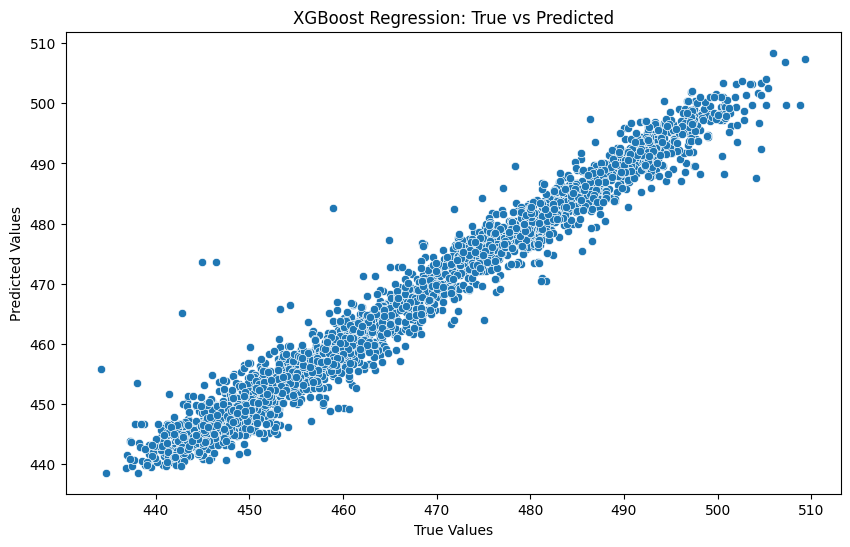

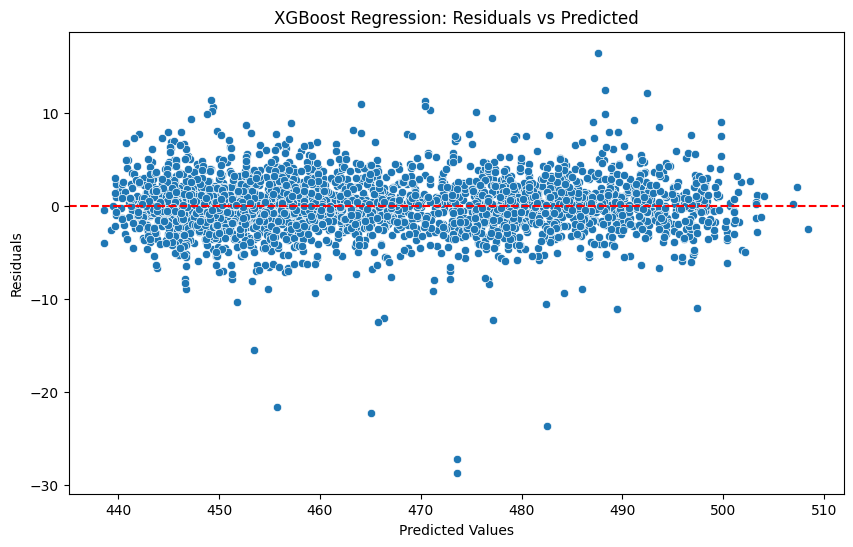

In [23]:
# Importáljuk az XGBoost könyvtárat
import xgboost as xgb

# Létrehozzuk az XGBoost regressziós modellt
xgb_model = xgb.XGBRegressor()

# Modell kiképzése a tanító adathalmazon
xgb_model.fit(X_train_scaled, y_train)

# Modell értékelése a teszthalmazon
xgb_y_pred = xgb_model.predict(X_test_scaled)

# Mean Squared Error (MSE) számítása
xgb_mse = mean_squared_error(y_test, xgb_y_pred)

# R-squared (R^2) számítása
xgb_r2 = r2_score(y_test, xgb_y_pred)

# Eredmények kiíratása
print(f"XGBoost Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"XGBoost R-squared (R^2): {xgb_r2:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Modell által becsült és valós eredmények összehasonlítása
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=xgb_y_pred)
plt.title('XGBoost Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# A residuálisok ábrázolása
residuals = y_test - xgb_y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=xgb_y_pred, y=residuals)
plt.title('XGBoost Regression: Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


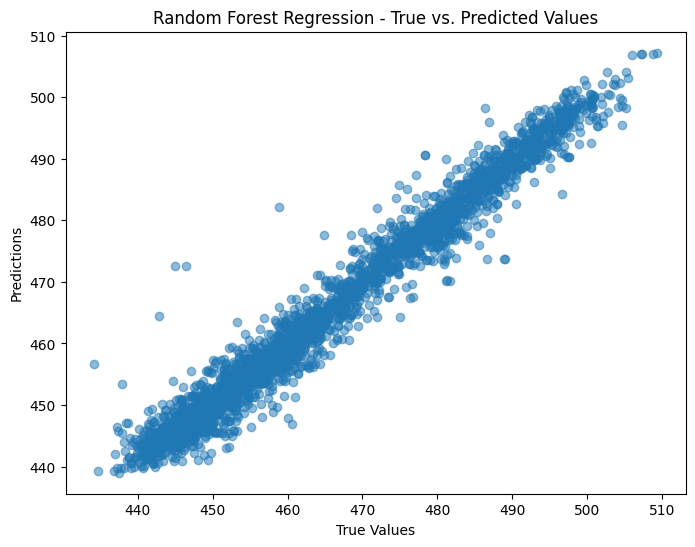

Random Forest Regression Results:
Train Mean Squared Error (MSE): 1.39
Train R-squared (R^2): 1.00
Test Mean Squared Error (MSE): 9.03
Test R-squared (R^2): 0.97


In [22]:
# Import Necessary Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize Data Structures
results_rf = {}

# Create a Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train_scaled, y_train)

# Make Predictions
rf_y_pred_train = rf_model.predict(X_train_scaled)
rf_y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the Model
rf_mse_train = mean_squared_error(y_train, rf_y_pred_train)
rf_mse_test = mean_squared_error(y_test, rf_y_pred_test)
rf_r2_train = r2_score(y_train, rf_y_pred_train)
rf_r2_test = r2_score(y_test, rf_y_pred_test)

# Store Results
results_rf["Train"] = [rf_mse_train, rf_r2_train]
results_rf["Test"] = [rf_mse_test, rf_r2_test]

# Visualize Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred_test, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression - True vs. Predicted Values")
plt.show()

# Print Results
print("Random Forest Regression Results:")
print(f"Train Mean Squared Error (MSE): {rf_mse_train:.2f}")
print(f"Train R-squared (R^2): {rf_r2_train:.2f}")
print(f"Test Mean Squared Error (MSE): {rf_mse_test:.2f}")
print(f"Test R-squared (R^2): {rf_r2_test:.2f}")